# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!



In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.30 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
from train import load_yaml, dqn, plot_results, test_agent

In [3]:
# Load the config file
settings = load_yaml("settings.yaml")

# Load the environment (local)
env = UnityEnvironment(file_name=settings['data'])


# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# Define the agent
train_params = {
'BUFFER_SIZE' : int(1e5),  # replay buffer size
'BATCH_SIZE' : 64,         # minibatch size
'GAMMA' : 0.99,            # discount factor
'TAU' : 1e-3,              # for soft update of target parameters
'LR' : 5e-4,               # learning rate 
'UPDATE_EVERY' : 4        # how often to update the network
}


agent = Agent(state_size=settings['state_size'], action_size=settings['action_size'], seed=settings['seed'],
             train_params=train_params)

In [5]:
%%time
# Train the agent
scores = dqn(agent, env, brain_name, settings)


Episode 577	Average Score: 13.00
Environment solved in 477 episodes!	Average Score: 13.00
CPU times: user 14min 21s, sys: 1min 11s, total: 15min 32s
Wall time: 19min 16s


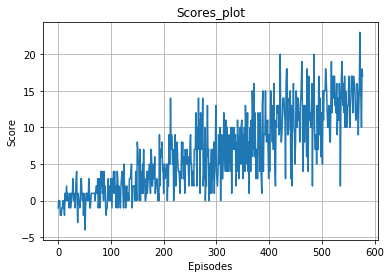

In [6]:
# Plot and save the results
plot_results(scores, 'Scores_plot')

In [10]:
# Test the agent
%reload_ext autoreload
%autoreload 2
from train import test_agent


test_agent(env, brain_name, settings, train_params)

The trained agent found the goal: 13 average score, over 100 episodes


In [11]:
# Close the environment
env.close()